In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
34/37 [==========================>...] - ETA: 0s - loss: 2.2720 - accuracy: 0.1110 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 1s 8ms/step - loss: 2.2638 - accuracy: 0.1152 - val_loss: 2.1258 - val_accuracy: 0.2478
Epoch 2/1000
29/37 [======================>.......] - ETA: 0s - loss: 2.1365 - accuracy: 0.1975
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 2.1288 - accuracy: 0.2010 - val_loss: 2.0504 - val_accuracy: 0.2332
Epoch 3/1000
34/37 [==========================>...] - ETA: 0s - loss: 2.0411 - accuracy: 0.2539
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 2.0348 - accuracy: 0.2557 - val_loss: 1.9487 - val_accuracy: 0.2928
Epoch 4/1000
36/37 [============================>.] - ETA: 0s - loss: 1.9308 - accuracy: 0.2752


35/37 [===========================>..] - ETA: 0s - loss: 1.1832 - accuracy: 0.5489
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.1828 - accuracy: 0.5480 - val_loss: 0.8458 - val_accuracy: 0.7978
Epoch 29/1000
33/37 [=========================>....] - ETA: 0s - loss: 1.1677 - accuracy: 0.5616
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.1727 - accuracy: 0.5581 - val_loss: 0.8232 - val_accuracy: 0.8131
Epoch 30/1000
36/37 [============================>.] - ETA: 0s - loss: 1.1817 - accuracy: 0.5553
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.1817 - accuracy: 0.5564 - val_loss: 0.8067 - val_accuracy: 0.8080
Epoch 31/1000
36/37 [============================>.] - ETA: 0s - loss: 1.1368 - accuracy: 0.5744
Epoch 31

36/37 [============================>.] - ETA: 0s - loss: 1.0091 - accuracy: 0.6365
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0119 - accuracy: 0.6342 - val_loss: 0.6195 - val_accuracy: 0.8809
Epoch 56/1000
 1/37 [..............................] - ETA: 0s - loss: 0.9214 - accuracy: 0.6875
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.6352 - val_loss: 0.6163 - val_accuracy: 0.8783
Epoch 57/1000
35/37 [===========================>..] - ETA: 0s - loss: 1.0125 - accuracy: 0.6301
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0116 - accuracy: 0.6308 - val_loss: 0.6135 - val_accuracy: 0.8777
Epoch 58/1000
 1/37 [..............................] - ETA: 0s - loss: 0.9835 - accuracy: 0.6250
Epoch 58

32/37 [========================>.....] - ETA: 0s - loss: 0.9557 - accuracy: 0.6497
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9573 - accuracy: 0.6490 - val_loss: 0.5427 - val_accuracy: 0.8973
Epoch 83/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.9636 - accuracy: 0.6569
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9585 - accuracy: 0.6587 - val_loss: 0.5549 - val_accuracy: 0.8885
Epoch 84/1000
37/37 [==============================] - ETA: 0s - loss: 0.9629 - accuracy: 0.6490
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9629 - accuracy: 0.6490 - val_loss: 0.5476 - val_accuracy: 0.8942
Epoch 85/1000
36/37 [============================>.] - ETA: 0s - loss: 0.9279 - accuracy: 0.6602
Epoch 85

37/37 [==============================] - ETA: 0s - loss: 0.9215 - accuracy: 0.6682
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9215 - accuracy: 0.6682 - val_loss: 0.5284 - val_accuracy: 0.8948
Epoch 110/1000
36/37 [============================>.] - ETA: 0s - loss: 0.9365 - accuracy: 0.6623
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9338 - accuracy: 0.6638 - val_loss: 0.5327 - val_accuracy: 0.8961
Epoch 111/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.9181 - accuracy: 0.6667
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9135 - accuracy: 0.6684 - val_loss: 0.5166 - val_accuracy: 0.8986
Epoch 112/1000
 1/37 [..............................] - ETA: 0s - loss: 0.8539 - accuracy: 0.7188
Ep

Epoch 136/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8800 - accuracy: 0.6868
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.6877 - val_loss: 0.5067 - val_accuracy: 0.8935
Epoch 137/1000
37/37 [==============================] - ETA: 0s - loss: 0.8869 - accuracy: 0.6752
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8869 - accuracy: 0.6752 - val_loss: 0.5059 - val_accuracy: 0.9049
Epoch 138/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8742 - accuracy: 0.6886
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.6898 - val_loss: 0.5039 - val_accuracy: 0.9037
Epoch 139/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8689 - accu

Epoch 163/1000
 1/37 [..............................] - ETA: 0s - loss: 0.6574 - accuracy: 0.7891
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8519 - accuracy: 0.7041 - val_loss: 0.4839 - val_accuracy: 0.8992
Epoch 164/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8877 - accuracy: 0.6824
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.6877 - val_loss: 0.4898 - val_accuracy: 0.9005
Epoch 165/1000
 1/37 [..............................] - ETA: 0s - loss: 0.8766 - accuracy: 0.7031
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.7012 - val_loss: 0.4926 - val_accuracy: 0.8980
Epoch 166/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.8676 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8973


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 65ms/step
[0.12152366 0.23484245 0.01634194 0.36818242 0.00073561 0.19491017
 0.00613451 0.05558944 0.00173974]
3


# 混同行列

50/50 [==============================] - 0s 868us/step


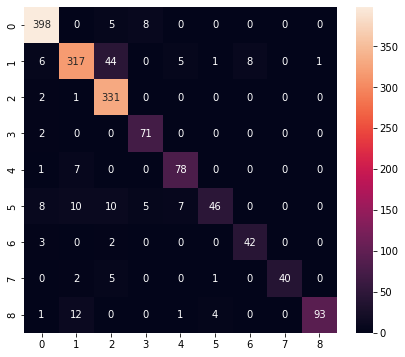

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       411
           1       0.91      0.83      0.87       382
           2       0.83      0.99      0.91       334
           3       0.85      0.97      0.90        73
           4       0.86      0.91      0.88        86
           5       0.88      0.53      0.67        86
           6       0.84      0.89      0.87        47
           7       1.00      0.83      0.91        48
           8       0.99      0.84      0.91       111

    accuracy                           0.90      1578
   macro avg       0.90      0.86      0.87      1578
weighted avg       0.90      0.90      0.89      1578



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\nicho\AppData\Local\Temp\tmpxchtmd2o\assets


6764

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 997 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.1215236  0.23484263 0.01634196 0.36818227 0.00073561 0.19491014
 0.00613451 0.05558955 0.00173974]
3
